In [2]:
import os
import datetime
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import glob
import scipy.io as sio

import netCDF4 as nc
from salishsea_tools import tidetools
from nowcast import (analyze, figures, research_ferries_test as rft)

%matplotlib inline

In [3]:
from importlib import reload

In [4]:
today = datetime.datetime.today()
yesterday = today - datetime.timedelta(days=12)
tomorrow = today + datetime.timedelta(days=1)
period = '1h'
grid = 'grid_T'
dmy = '07dec15'
date = datetime.datetime.strptime(dmy, "%d%b%y")
dmyf = '06dec15'
datef = datetime.datetime.strptime(dmyf, "%d%b%y")
print(date)

2015-12-07 00:00:00


Step 0: Load the datasets and files that are available in nowcast/make_plots. 
These will be used as inputs, not to be reloaded in the module

In [121]:
grid_T_hr = nc.Dataset(analyze.get_filenames(yesterday, tomorrow, period, grid, '/results/SalishSea/nowcast/')[0])
coastline = sio.loadmat('/ocean/rich/more/mmapbase/bcgeo/PNW.mat')
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy, X, Y = tidetools.get_SS2_bathy_data()

## A : Preparing ferry data
Step 1: Get ferry data

In [73]:
obs = rft._get_sal_data('TWDP', dmyf)

Step 2: Slicing ferry data

In [74]:
route_name='TWDP'
start_time = date.replace(hour=rft.route[route_name]['start']['hour'], minute=rft.route[route_name]['start']['minute'])
end_time = date.replace(hour=rft.route[route_name]['end']['hour'], minute=rft.route[route_name]['end']['minute'])
print(start_time)

2015-12-07 03:00:00


In [103]:
obs_sal = rft.ferry_salinity('TWDP', dmyf, dmy)
print(obs_sal[:,1])

[  7.36305127e+05  -1.23424979e+02   4.90669632e+01   2.90790000e+01]


## B: Preparing model data

In [60]:
sal_a, sal_b = rft.nemo_salinity('TWDP', grid_T_hr)

(898, 398)


## C: Find corresponding model point to obs data
For each ferry route point we want to find the closest model point. From that model point we then find the 8 nearest points and compute and inverse distance interpolation.

In [91]:
rft.model_IDW(obs_sal[:,1], bathy, grid_T_hr, sal_a, sal_b)

(23.736572088396642, 25.560538576439797)

In [106]:
rft.nemo_sal_route(grid_T_hr, bathy, route_name, obs_sal)

(array([ 23.51463008,  23.73657209,  24.21979518,  24.95236385,
         25.35509834,  25.81557493,  26.05765213,  26.15067259,
         26.29849066,  25.00604345,  23.35499485,  21.88702272,
         22.88673489,  23.03655714]),
 array([ 25.10036592,  25.56053858,  26.22473394,  26.94366049,
         27.60190052,  28.08378872,  28.35386171,  28.46467838,
         28.25160207,  26.75450027,  25.2376472 ,  23.96799676,
         25.63004668,  23.62641984]))

In [112]:
figures.plot_map()

TypeError: plot_map() missing 3 required positional arguments: 'ax', 'grid_B', and 'PNW_coastline'

In [127]:
reload(rft)

<module 'nowcast.research_ferries_test' from '/ocean/mdunn/MEOPAR/tools/SalishSeaNowcast/nowcast/research_ferries_test.py'>

/home/mdunn/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


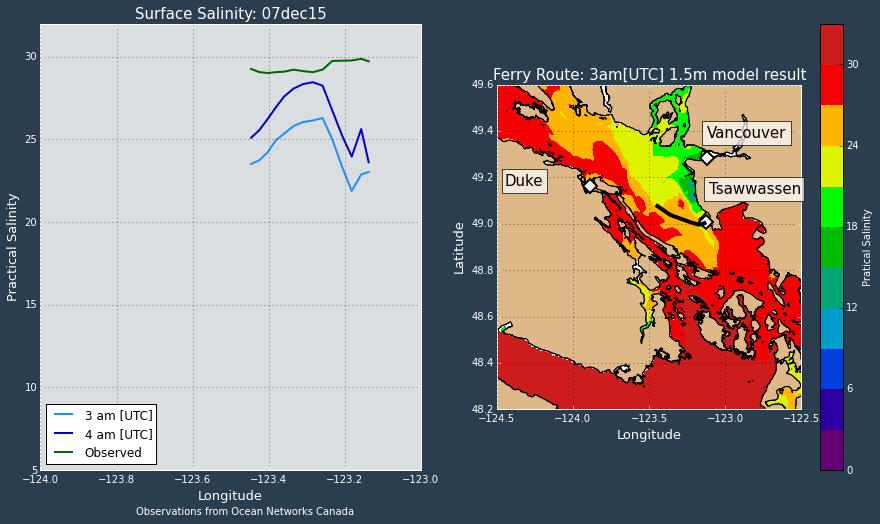

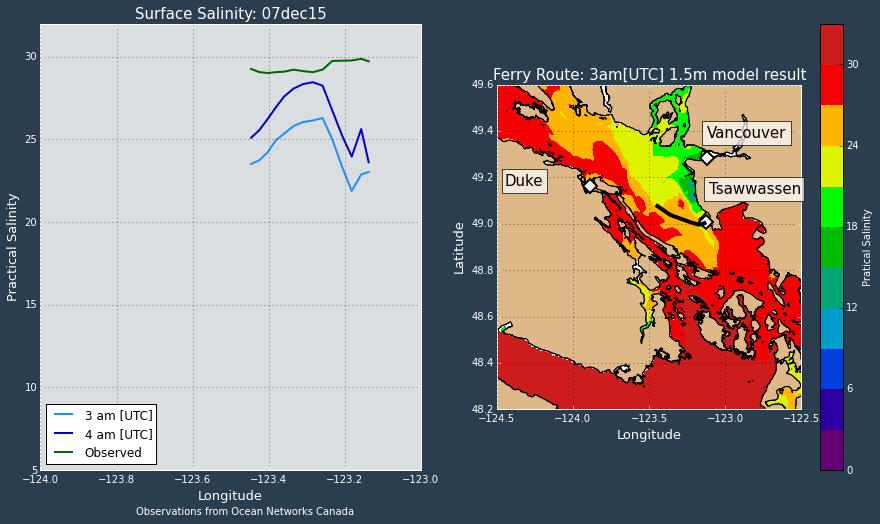

In [128]:
rft.salinity_ferry_route(grid_T_hr, grid_B, bathy, coastline, route_name, dmyf, dmy)